# Notebook 3: Extra Use Cases

**TurboPanda** still has more to offer to allow seemless flowing of `pandas`-like operations, and indeed into `scikit-learn`.

In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.insert(0,"../")
# our main import
import turbopanda as turb

import matplotlib.pyplot as plt
%matplotlib inline

turb.__version__

'0.1.6'

## Correlation Matrices

In `pandas`, there exists a basic correlation function `corr()` which takes a method type among other things and returns a correlation matrix. I found this to be clunky and unreliable.

1. *Case one*: when two features are not BOTH continuous.
2. *Case two*: when features are not type-casted properly due to `pandas` poor handling of missing data.
3. *Case three*: when desiring to compare *between* two datasets (say Matrix and Vector). `pandas` only provides intra-correlations between features in a *single dataframe*.

***

| Use case | `pandas` response | `turbopanda` response |
| --------------------- | ----------------- | --------------- |
| One matrix $X$ | Correlates all using `method`<br>parameter (spearman, pearson)<br>returning Matrix | Correlates all using most<br>appropriate method (spearman,<br>pearson for continuous, biserial for boolean/cont)<br>returning Matrix |
| Two vectors $x$,$y$ of same shape | *Does not handle* | Correlates using appropriate method<br>returning single value |
| One matrix $X$, one Vector $y$ | *Does not handle* | Correlates every column $X_i$ to vector $y$<br>using appropriate method returning<br>Vector $z$ |
| Two matrices $X$,$Y$ of same shape | *Does not handle* | Correlates column $X_i$ with $Y_i$ using <br>most appropriate method returning<br>Vector $z$ |
| Two matrices $X$,$Y$ of different shapes | *Does not handle* | *Does not handle* |
 
***

In `turbopanda`, we have a dedicated `correlate(X, Y=None)` function which handles missing, heterogenous datasets in the following way:



In [2]:
g = turb.read("translation.csv", name="Translation")
g

MetaPanda(Translation(n=5216, p=14, mem=0.585MB, key='None'), mode='instant')

In [3]:
def correlation_matrix(C):
    plt.figure(figsize=(7,6))
    # plot
    plt.pcolormesh(C, cmap="Reds")
    # adjust ticks
    plt.xticks(range(C.shape[1]), labels=C.columns.values, rotation=50, horizontalalignment="center")
    plt.yticks(range(C.shape[1]), labels=C.index.values)
    # colorbar
    plt.colorbar(label=r"$r_s$")

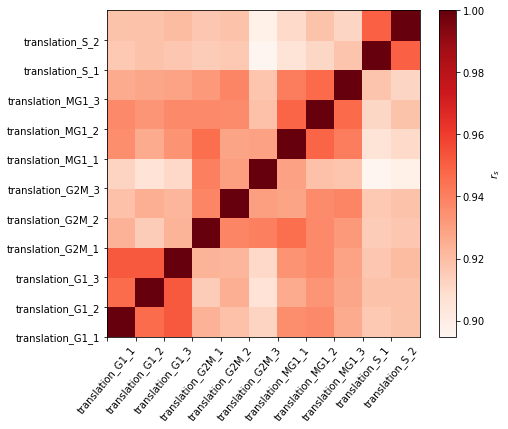

In [4]:
corr = turb.correlate(g)
correlation_matrix(corr.df_)

## Correlation by rows

In certain use cases, you don't necessarily want the correlation matrix, but just every pairwise correlation in a stack of rows. 

This is nice when you want more detail, such as p-values, $n$ and which type of method was used (it isn't always spearman depending on the feature types).

This can be achieved using the `style` keyword:

In [7]:
corr_rows = turb.correlate(g, style="rows")
corr_rows.head()

,column1,column2,r,p-val,rtype,n
0,translation_G1_1,translation_G1_2,0.94675,0,spearman,4635
1,translation_G1_1,translation_G1_3,0.952289,0,spearman,4654
2,translation_G1_1,translation_G2M_1,0.924073,0,spearman,4543
3,translation_G1_1,translation_G2M_2,0.919471,0,spearman,4562
4,translation_G1_1,translation_G2M_3,0.912911,0,spearman,4568
